<a href="https://colab.research.google.com/github/KaylaBai/Dissertation/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dissertation Code

#### Load Packages

In [102]:
import pandas as pd
import numpy as np
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

### Geo Data

In [121]:
# Read Province boundaries shapefile
# file_path = "https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/Province/province_boundaries.shp"
boundaries = gpd.read_file("/content/province_boundaries.shp").loc[:,["NAME","geometry"]]
# boundaries = gpd.read_file(file_path)

# print the data
boundaries


,NAME,geometry
0,Heilongjiang,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,Xinjiang,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,Shanxi,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,Ningxia,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,Tibet,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."
5,Shandong,"POLYGON ((915805.657 4438424.999, 917551.296 4..."
6,Henan,"POLYGON ((915805.657 4438424.999, 913869.987 4..."
7,Jiangsu,"POLYGON ((1261146.339 4381810.235, 1264548.546..."
8,Anhui,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
9,Hubei,"POLYGON ((547929.620 4087821.980, 551532.202 4..."


<Axes: >

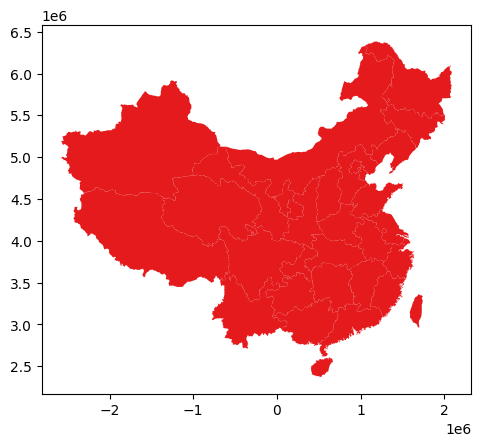

In [122]:
# plot the map
boundaries.plot()

### GRP Growth Rate

In [105]:
# Step 1: Read the CSV file into a DataFrame
grp_data = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/grp_data.csv", index_col=0, header=0)

# Step 2: Reverse the order of columns
grp_data = grp_data.iloc[:, ::-1]

grp_data.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,5267.2,6252.5,7149.8,8387.0,10425.5,11813.1,12900.9,14964.0,17188.8,19024.7,21134.6,22926.0,24779.1,27041.2,29883.0,33106.0,35445.1,35943.3,41045.6,41610.9
Tianjin,2257.8,2621.1,3158.6,3538.2,4158.4,5182.4,5709.6,6830.8,8112.5,9043.0,9945.4,10640.6,10879.5,11477.2,12450.6,13362.9,14055.5,14008.0,15685.1,16311.3
Hebei,6333.6,7588.6,8773.4,10043.0,12152.9,14200.1,15306.9,18003.6,21384.7,23077.5,24259.6,25208.9,26398.4,28474.1,30640.8,32494.6,34978.6,36013.8,40397.1,42370.4
Shanxi,2854.3,3496.0,4079.4,4713.6,5935.6,7223.0,7147.6,8903.9,10894.4,11683.1,11987.2,12094.7,11836.4,11946.4,14484.3,15958.1,16961.6,17835.6,22870.4,25642.6
Inner Mongolia,2388.4,2942.4,3523.7,4161.8,5166.9,6242.4,7104.2,8199.9,9458.1,10470.1,11392.4,12158.2,12949.0,13789.3,14898.1,16140.8,17212.5,17258.0,21166.0,23158.6


In [106]:

# Step 2: Create a new DataFrame 'growth_rate' to store the calculated growth rates
growth_rate = pd.DataFrame(index=grp_data.index, columns=grp_data.columns)

# Step 3: Calculate the growth rate for each province and year combination
growth_rate = grp_data.pct_change(axis=1) * 100
growth_rate.head()

# Display the 'growth_rate' DataFrame
growth_rate.head()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,18.706334,14.351060,17.303981,24.305473,13.309673,9.208421,15.991908,14.867682,10.680792,11.090319,8.476148,8.082963,9.129064,10.509149,10.785396,7.065487,1.405554,14.195413,1.377249
Tianjin,NaN,16.090885,20.506658,12.017983,17.528687,24.624856,10.172893,19.637102,18.763542,11.469954,9.978989,6.990166,2.245174,5.493819,8.481163,7.327358,5.183007,-0.337946,11.972444,3.992324
Hebei,NaN,19.814955,15.612893,14.471015,21.008663,16.845362,7.794311,17.617545,18.780133,7.915940,5.122305,3.913090,4.718572,7.862977,7.609371,6.050103,7.644347,2.959524,12.171168,4.884757
Shanxi,NaN,22.481869,16.687643,15.546404,25.924983,21.689467,-1.043888,24.571884,22.355372,7.239499,2.602905,0.896790,-2.135646,0.929337,21.244057,10.175155,6.288343,5.152816,28.228935,12.121345
Inner Mongolia,NaN,23.195445,19.755982,18.108806,24.150608,20.815189,13.805588,15.423271,15.344090,10.699823,8.808894,6.722025,6.504252,6.489304,8.041017,8.341332,6.639696,0.264343,22.644571,9.414155


In [107]:
growth_rate = grp_data.pct_change(axis=1) * 100
growth_rate.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,18.706334,14.351060,17.303981,24.305473,13.309673,9.208421,15.991908,14.867682,10.680792,11.090319,8.476148,8.082963,9.129064,10.509149,10.785396,7.065487,1.405554,14.195413,1.377249
Tianjin,NaN,16.090885,20.506658,12.017983,17.528687,24.624856,10.172893,19.637102,18.763542,11.469954,9.978989,6.990166,2.245174,5.493819,8.481163,7.327358,5.183007,-0.337946,11.972444,3.992324
Hebei,NaN,19.814955,15.612893,14.471015,21.008663,16.845362,7.794311,17.617545,18.780133,7.915940,5.122305,3.913090,4.718572,7.862977,7.609371,6.050103,7.644347,2.959524,12.171168,4.884757
Shanxi,NaN,22.481869,16.687643,15.546404,25.924983,21.689467,-1.043888,24.571884,22.355372,7.239499,2.602905,0.896790,-2.135646,0.929337,21.244057,10.175155,6.288343,5.152816,28.228935,12.121345
Inner Mongolia,NaN,23.195445,19.755982,18.108806,24.150608,20.815189,13.805588,15.423271,15.344090,10.699823,8.808894,6.722025,6.504252,6.489304,8.041017,8.341332,6.639696,0.264343,22.644571,9.414155


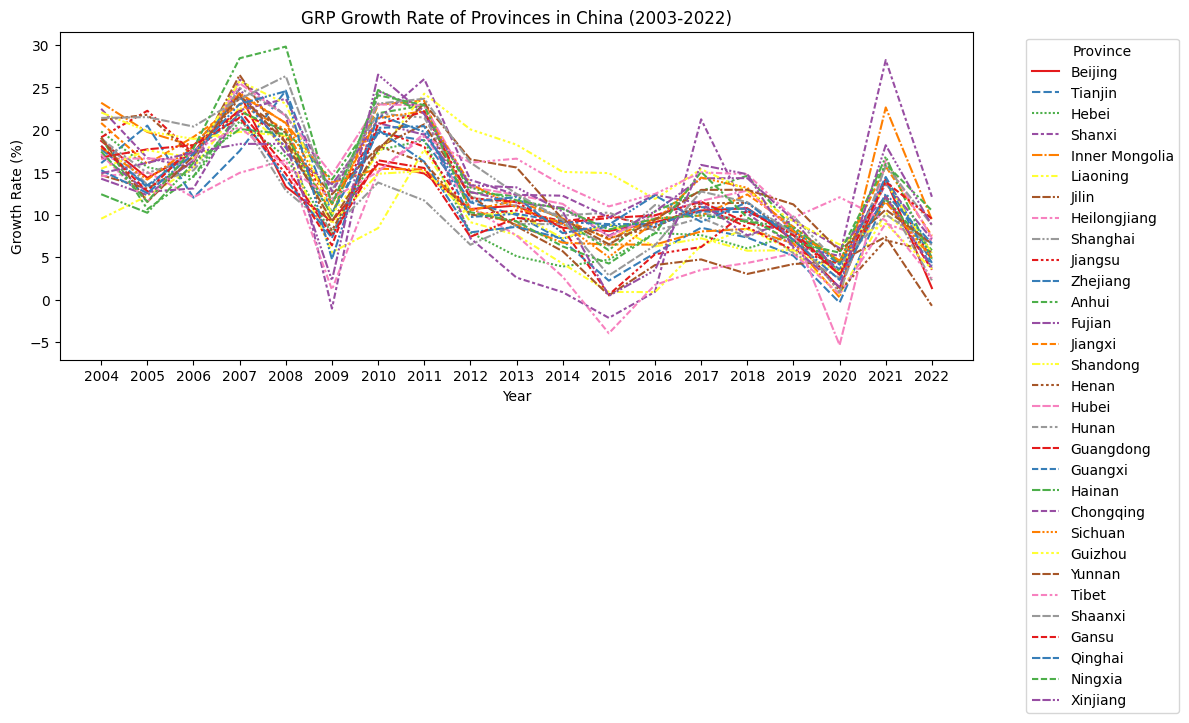

In [108]:
# Step 4: Draw line plots for each province using Seaborn
plt.figure(figsize=(12, 6))
sns.set_palette("Set1", n_colors=len(growth_rate))
sns.lineplot(data=growth_rate.T)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('GRP Growth Rate of Provinces in China (2003-2022)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.tight_layout()
plt.show()

### GRP per capita

In [109]:
# Step 1: Read the CSV file into a DataFrame
grppc_data = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/grp_pc.csv", index_col=0, header=0)

# Step 2: Reverse the order of columns
grppc_data = grppc_data.iloc[:, ::-1]

grppc_data.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,36583,42402,47182,53438,63629,68541,71059,78307,86246,92758,100569,106732,113692,123391,136172,150962,161776,164158,187526,190313
Tianjin,22371,25761,30567,33411,37976,45242,47497,54053,61458,66517,71345,74960,75868,79647,87280,95689,101557,101068,113660,119235
Hebei,9380,11178,12845,14609,17561,20385,21831,25308,29647,31844,33346,34507,35994,38688,41451,43808,47036,48302,54181,56995
Shanxi,8639,10515,12195,14008,17542,21234,20906,25434,30534,32864,33848,34248,33593,33972,41242,45517,48469,51051,65625,73675
Inner Mongolia,10015,12315,14695,17275,21334,25620,28982,33262,38276,42441,46320,49585,52972,56560,61196,66491,71170,71640,88137,96474


In [110]:

# Step 2: Create a new DataFrame 'growth_rate' to store the calculated growth rates
pc_growth_rate = pd.DataFrame(index=grppc_data.index, columns=grppc_data.columns)

# Step 3: Calculate the growth rate for each province and year combination
pc_growth_rate = grppc_data.pct_change(axis=1) * 100
pc_growth_rate.head()

# Display the 'growth_rate' DataFrame
pc_growth_rate.head()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,15.906295,11.273053,13.259294,19.070699,7.719750,3.673714,10.199975,10.138302,7.550495,8.420837,6.128131,6.521006,8.530943,10.358130,10.861264,7.163392,1.472406,14.235066,1.486194
Tianjin,NaN,15.153547,18.656108,9.304152,13.663165,19.133137,4.984307,13.802977,13.699517,8.231638,7.258295,5.066928,1.211313,4.981020,9.583537,9.634510,6.132366,-0.481503,12.458939,4.904980
Hebei,NaN,19.168443,14.913222,13.732970,20.206722,16.081089,7.093451,15.926893,17.144776,7.410531,4.716744,3.481677,4.309271,7.484581,7.141749,5.686232,7.368517,2.691555,12.171339,5.193703
Shanxi,NaN,21.715476,15.977175,14.866749,25.228441,21.046631,-1.544692,21.658854,20.051899,7.630838,2.994158,1.181754,-1.912520,1.128211,21.399976,10.365647,6.485489,5.327116,28.547923,12.266667
Inner Mongolia,NaN,22.965552,19.326025,17.556992,23.496382,20.089997,13.122560,14.767787,15.074259,10.881492,9.139747,7.048791,6.830695,6.773390,8.196605,8.652526,7.037043,0.660391,23.027638,9.459137


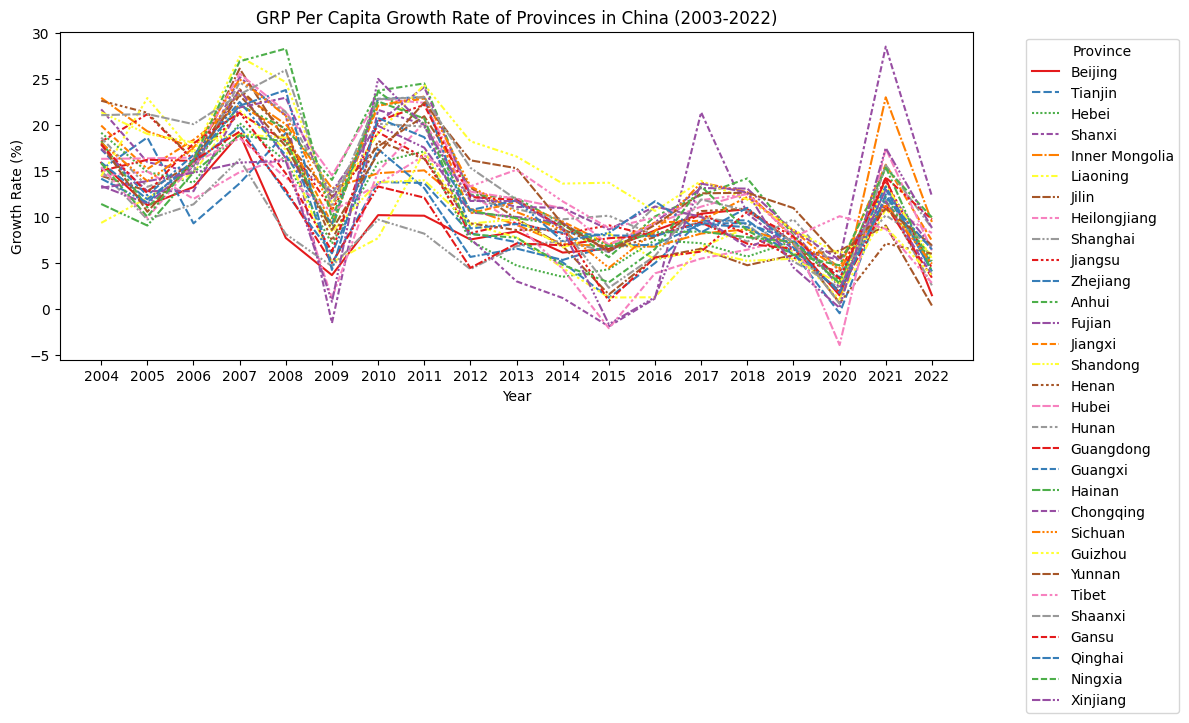

In [111]:
# Step 4: Draw line plots for each province using Seaborn
plt.figure(figsize=(12, 6))
sns.set_palette("Set1", n_colors=len(pc_growth_rate))
sns.lineplot(data=pc_growth_rate.T)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('GRP Per Capita Growth Rate of Provinces in China (2003-2022)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.tight_layout()
plt.show()

### Resource Abundance

In [112]:
# Read data
inv_mining = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/fixedinv_mining.csv', index_col='Region')
inv_all = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/fixedinv_all.csv', index_col='Region')

inv_mining = inv_mining.iloc[:, ::-1]
inv_all = inv_all.iloc[:, ::-1]

# Calculate the proportion of fixed investment in mining to total fixed investment for each year and province
RE = inv_mining.div(inv_all) * 100

# check the result
RE.head()


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,,,,,,,
Beijing,0.217546,0.155631,0.224487,0.312244,0.804782,0.500336,0.172127,0.155945,0.070349,0.132903,0.103983,0.034685,0.036506,0.037035
Tianjin,9.512724,8.313825,10.068662,7.700480,7.917871,8.330168,4.915500,3.218869,2.507940,3.596854,2.993858,2.240534,0.857630,1.540451
Hebei,1.854728,3.239365,4.429454,4.235479,4.024090,2.904693,2.915125,3.514488,3.155946,2.979193,2.473765,1.907071,1.393386,1.140786
Shanxi,11.981439,16.188547,15.578313,14.352612,15.048709,13.928225,17.629305,20.159477,17.845498,13.370317,11.451698,10.024726,7.427807,7.780813
Inner Mongolia,6.152125,9.744288,12.134277,13.533353,16.691018,13.158325,11.123061,9.412264,9.400709,11.163785,9.674962,6.886485,5.995358,6.595210


In [113]:
RE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Beijing to Xinjiang
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2004    31 non-null     float64
 1   2005    31 non-null     float64
 2   2006    31 non-null     float64
 3   2007    31 non-null     float64
 4   2008    31 non-null     float64
 5   2009    31 non-null     float64
 6   2010    31 non-null     float64
 7   2011    31 non-null     float64
 8   2012    31 non-null     float64
 9   2013    31 non-null     float64
 10  2014    31 non-null     float64
 11  2015    31 non-null     float64
 12  2016    31 non-null     float64
 13  2017    31 non-null     float64
dtypes: float64(14)
memory usage: 3.6+ KB


### Merge data

In [114]:
pcgrowth_04_17 = pc_growth_rate.iloc[:,1:-5]
pcgrowth_04_17_long = pcgrowth_04_17.reset_index().melt(id_vars = "Region",var_name='Year', value_name='GRPpcGrowth')
pcgrowth_04_17_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       434 non-null    object 
 1   Year         434 non-null    object 
 2   GRPpcGrowth  434 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.3+ KB


In [115]:
RE_long = RE.reset_index().melt(id_vars = "Region",var_name='Year', value_name='RE')
RE_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  434 non-null    object 
 1   Year    434 non-null    object 
 2   RE      434 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.3+ KB


In [123]:
# Merge the dataframes based on "Region" and "Year"
df = pd.merge(RE_long, pcgrowth_04_17_long, on=['Region', 'Year'])
df = df.merge(boundaries, how="left",left_on="Region",right_on="NAME").drop(["NAME"],axis=1)
gdf = gpd.GeoDataFrame(df, geometry="geometry")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Region       434 non-null    object  
 1   Year         434 non-null    object  
 2   RE           434 non-null    float64 
 3   GRPpcGrowth  434 non-null    float64 
 4   geometry     434 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 20.3+ KB


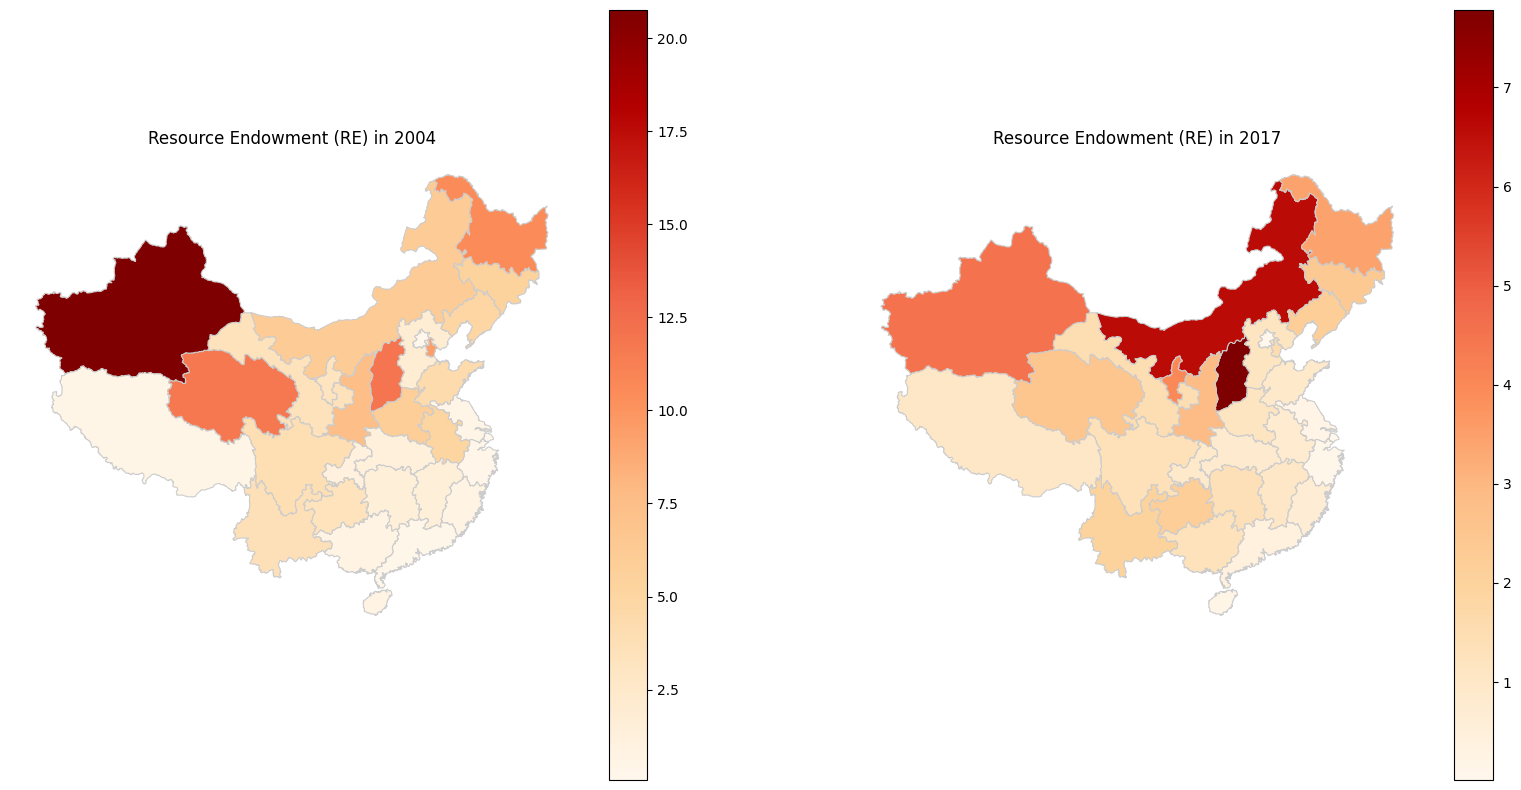

In [127]:

# Filter the df_merged dataframe for the year 2004 and 2017
gdf_2004 = gdf[gdf["Year"] == "2004"]
gdf_2017 = gdf[gdf["Year"] == "2017"]


# Plotting choropleth maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Choropleth map for RE values at year 2004
gdf_2004.plot(column="RE", cmap="OrRd", linewidth=0.8, ax=ax1, edgecolor="0.8", legend=True)
ax1.set_title("Resource Endowment (RE) in 2004")
ax1.axis("off")

# Choropleth map for RE values at year 2017
gdf_2017.plot(column="RE", cmap="OrRd", linewidth=0.8, ax=ax2, edgecolor="0.8", legend=True)
ax2.set_title("Resource Endowment (RE) in 2017")
ax2.axis("off")

# Show the plot
plt.show()

## Panel Regression

### Pooled Regression